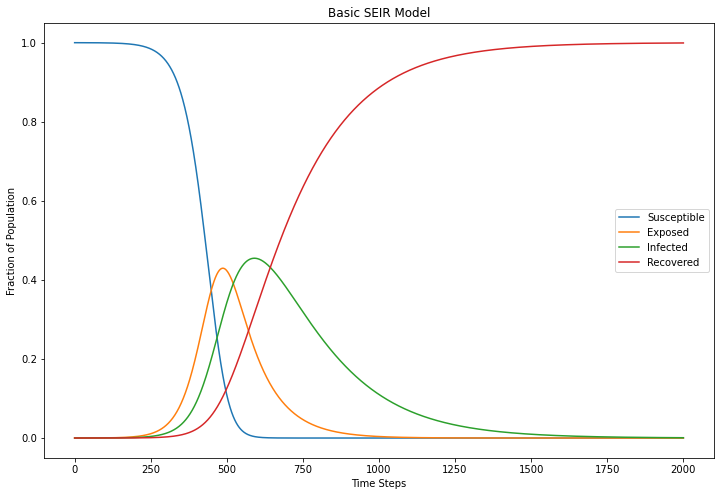

In [17]:
# Basic SEIR Model: Uses code from https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t_max = 100
dt = .05
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.1
rho=1
params = alpha, beta, gamma, rho

def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for k in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

# Run simulation
results = seir_model_with_soc_dist(init_vals, params, t)
# Plot results
plt.figure(figsize=(12,8))
# plt.stackplot(t, results.T)
plt.plot(results)
plt.title('Basic SEIR Model')
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
plt.xlabel('Time Steps')
plt.ylabel('Fraction of Population')
plt.show()


0.001603925909547886
0.028075727091569223


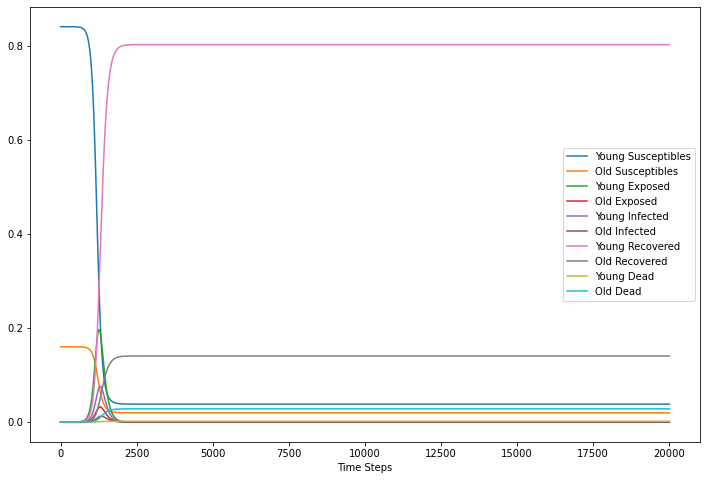

In [20]:
# This version of the model incorporates young and old populations, and gives all curves for fixed values

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t_max = 1000
dt = .05
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 20000
init_vals = 0.84 - 0.5/N, 0.16 - 0.5/N, 0.5/N, 0.5/N, 0, 0, 0, 0, 0, 0
alpha = 0.2
beta1 = 1.75
beta2 = 1
beta3 = 1.75
gamma = 0.5
rho1 = 0.4  # Contact rate between young people
rho2 = 0.25 # Contact rate between young and old people
rho3 = 0.25 # Contact rate between old people
mo1 = 0.001
mo2 = 0.1
params = alpha, beta1, beta2, beta3, gamma, mo1, mo2, rho1, rho2, rho3

def model(init_vals, params, t):
    SY_0, SO_0, EY_0, EO_0, IY_0, IO_0, RY_0, RO_0, MY_0, MO_0 = init_vals
    SY, EY, IY, RY, MY = [SY_0], [EY_0], [IY_0], [RY_0], [MY_0]
    SO, EO, IO, RO, MO = [SO_0], [EO_0], [IO_0], [RO_0], [MO_0]
    alpha, beta1, beta2, beta3, gamma, mo1, mo2, rho1, rho2, rho3 = params
    dt = t[1] - t[0]
    for k in t[1:]:
        if k < 20:
            _rho1 = rho1
            _rho2 = rho2
            _rho3 = rho3
        else:
            _rho1 = 1
            _rho2 = 1
            _rho3 = 1
        next_SY = SY[-1] - (_rho1*beta1*SY[-1]*IY[-1] + _rho2*beta2*SY[-1]*IO[-1])*dt
        next_SO = SO[-1] - (_rho3*beta3*SO[-1]*IO[-1] + _rho2*beta2*SO[-1]*IY[-1])*dt
        next_EY = EY[-1] + (_rho1*beta1*SY[-1]*IY[-1] + _rho2*beta2*SY[-1]*IO[-1] - alpha*EY[-1])*dt
        next_EO = EO[-1] + (_rho3*beta3*SO[-1]*IO[-1] + _rho2*beta2*SO[-1]*IY[-1] - alpha*EO[-1])*dt
        next_IY = IY[-1] + (alpha*EY[-1] - gamma*IY[-1])*dt
        next_IO = IO[-1] + (alpha*EO[-1] - gamma*IO[-1])*dt
        next_RY = RY[-1] + (gamma*IY[-1])*dt
        next_RO = RO[-1] + (gamma*IO[-1])*dt
        next_MY = MY[-1] + (mo1*IY[-1])*dt
        next_MO = MO[-1] + (mo2*IO[-1])*dt
        SY.append(next_SY)
        SO.append(next_SO)
        EY.append(next_EY)
        EO.append(next_EO)
        IY.append(next_IY)
        IO.append(next_IO)
        RY.append(next_RY)
        RO.append(next_RO)
        MY.append(next_MY)
        MO.append(next_MO)
    print(MY[-1])
    print(MO[-1])
    return np.stack([SY, SO, EY, EO, IY, IO, RY, RO, MY, MO]).T

# Run simulation
results = model(init_vals, params, t)
# Plot results
plt.figure(figsize=(12,8))
plt.plot(results)
plt.legend(['Young Susceptibles', 'Old Susceptibles', 'Young Exposed', 'Old Exposed', 'Young Infected', 'Old Infected', 'Young Recovered', 'Old Recovered', 'Young Dead', 'Old Dead'])
plt.xlabel('Time Steps')
plt.show()


0.05786438899695268


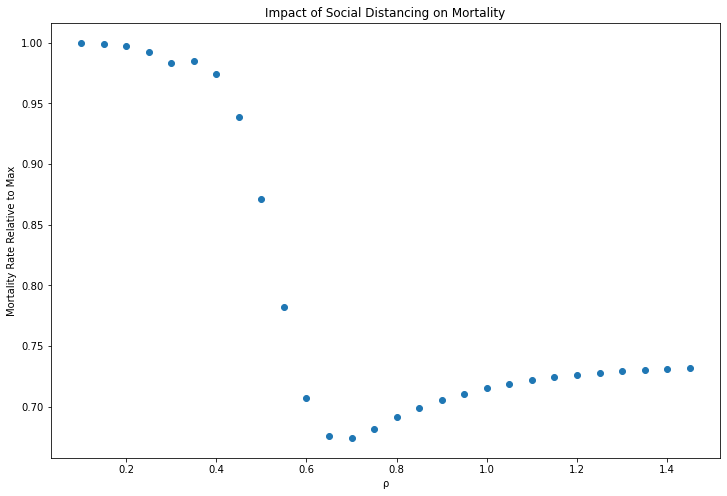

In [19]:
# Scan through various social distancing values and plot the relative mortality rates
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t_max = 1000
dt = .05
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 20000
init_vals = 0.84 - 0.84/N, 0.16 - 0.16/N, 0.84/N, 0.16/N, 0, 0, 0, 0, 0, 0
alpha = 0.2
beta1 = 1.75
beta2 = 1       # Assumes a smaller contact rate between young and old people than between people in the same age group
beta3 = 1.75
gamma = 0.5
rho2 = 0.5      # Contact rate between young and old people
rho3 = 0.5      # Contact rate between old people
m11 = 0.001     # Mortality rate is very low for young people
m21 = 0.1       # And the mortality rate is quite high for older people
m12 = 0.0015    # Low risk mortality rate with over-capacity adjustment
m22 = 0.3       # High risk mortality rate with over-capacity adjustment
k = 0.001       # Hospital bed capacity

def model(init_vals, params, t):
    SY_0, SO_0, EY_0, EO_0, IY_0, IO_0, RY_0, RO_0, MY_0, MO_0 = init_vals
    SY, EY, IY, RY, MY = [SY_0], [EY_0], [IY_0], [RY_0], [MY_0]
    SO, EO, IO, RO, MO = [SO_0], [EO_0], [IO_0], [RO_0], [MO_0]
    alpha, beta1, beta2, beta3, gamma, m11, m21, m12, m22, k, rho1, rho2, rho3, t_start, t_stop = params
    dt = t[1] - t[0]
    for l in t[1:]:
        if l > t_start and l < t_stop:
            _rho1 = rho1
            _rho2 = rho2
            _rho3 = rho3
        else:
            _rho1 = 1
            _rho2 = 1
            _rho3 = 1
        next_SY = SY[-1] - (_rho1*beta1*SY[-1]*IY[-1] + _rho2*beta2*SY[-1]*IO[-1])*dt
        next_SO = SO[-1] - (_rho3*beta3*SO[-1]*IO[-1] + _rho2*beta2*SO[-1]*IY[-1])*dt
        next_EY = EY[-1] + (_rho1*beta1*SY[-1]*IY[-1] + _rho2*beta2*SY[-1]*IO[-1] - alpha*EY[-1])*dt
        next_EO = EO[-1] + (_rho3*beta3*SO[-1]*IO[-1] + _rho2*beta2*SO[-1]*IY[-1] - alpha*EO[-1])*dt
        next_IY = IY[-1] + (alpha*EY[-1] - gamma*IY[-1])*dt
        next_IO = IO[-1] + (alpha*EO[-1] - gamma*IO[-1])*dt
        next_RY = RY[-1] + (gamma*IY[-1])*dt
        next_RO = RO[-1] + (gamma*IO[-1])*dt
        if (IY[-1] + IO[-1] < k):
            next_MY = MY[-1] + (m11*IY[-1])*dt
            next_MO = MO[-1] + (m21*IO[-1])*dt
        else:
            next_MY = MY[-1] + (m12*IY[-1])*dt
            next_MO = MO[-1] + (m22*IO[-1])*dt
        SY.append(next_SY)
        SO.append(next_SO)
        EY.append(next_EY)
        EO.append(next_EO)
        IY.append(next_IY)
        IO.append(next_IO)
        RY.append(next_RY)
        RO.append(next_RO)
        MY.append(next_MY)
        MO.append(next_MO)
    return MO+MY, next_MO+next_MY

# Run simulation
deaths = []
values = []
for rho1 in range(2, 30):
    t_start = 15
    t_stop = 105
    params = alpha, beta1, beta2, beta3, gamma, m11, m21, m12, m22, k, rho1/20, rho2, rho3, t_start, t_stop
    deaths.append(model(init_vals, params, t)[1])
    values.append(rho1/20)
print(min(deaths))
deaths = deaths / max(deaths)
# Plot results
plt.figure(figsize=(12,8))
plt.scatter(values, deaths)
plt.xlabel('ρ')
plt.ylabel('Mortality Rate Relative to Max')
plt.title('Impact of Social Distancing on Mortality')
plt.show()
